In [229]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [230]:
data = pd.read_csv('train_cab.csv')

In [231]:
#type conversion
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'],format = '%Y-%m-%d %H:%M:%S UTC',errors = 'coerce')

In [232]:
data['year'] = data['pickup_datetime'].dt.year
data['month'] = data['pickup_datetime'].dt.month
data['date'] = data['pickup_datetime'].dt.day
data['dayofweek'] = data['pickup_datetime'].dt.dayofweek
data['hour'] = data['pickup_datetime'].dt.hour
data['minute'] = data['pickup_datetime'].dt.minute

In [233]:
float_variable = ['passenger_count', 'year','month','date','dayofweek','hour','minute']

In [234]:
missing_val = pd.DataFrame(data.isnull().sum())

In [235]:
missing_val= missing_val.reset_index()

In [236]:
missing_val = missing_val.rename(columns= {'index':'features',0:'missing_percentage'})

In [237]:
missing_val['missing_percentage'] = (missing_val['missing_percentage']/len(data))*100

In [238]:
missing_val = missing_val.sort_values('missing_percentage', ascending = False).reset_index(drop = True)

In [239]:
missing_val.to_csv('missing_pecentage.csv', index = False)

In [240]:
data['fare_amount'] = pd.to_numeric(data['fare_amount'], errors = 'coerce')

In [241]:
data2 = data

In [242]:
data = data.dropna()

# Outlier Analysis

In [243]:
%matplotlib inline

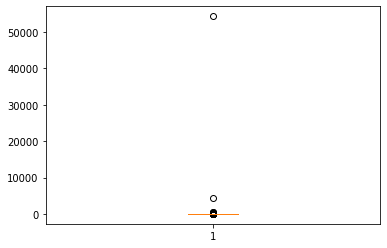

In [244]:
plt.boxplot(data['fare_amount'])
plt.show()

In [245]:
cnames = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

In [246]:
for i in cnames:
    q75, q25 = np.percentile(data.loc[:,i], [75,25])
    iqr = q75-q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    data = data.drop(data[data.loc[:,i]<min].index)
    data = data.drop(data[data.loc[:,i]>max].index)

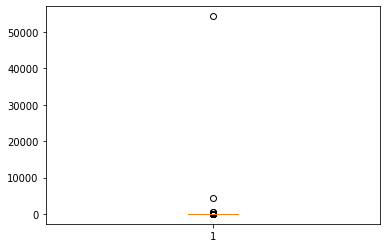

In [247]:
plt.boxplot(data['fare_amount'])
plt.show()

In [248]:
len(data)

13597

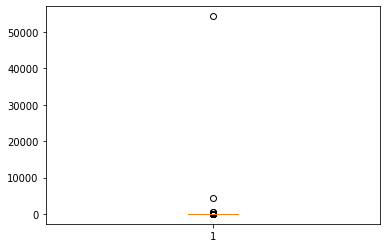

-2.1000000000000005
18.700000000000003
543


In [249]:
###outliers

# #Plot boxplot to visualize Outliers
# %matplotlib inline  
plt.boxplot(data['fare_amount'])
plt.show()

# #Detect and delete outliers from data
q75, q25 = np.percentile(data.loc[:,'fare_amount'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
    
sum=(data.loc[:,'fare_amount'] <= 0).sum() + (data.loc[:,'fare_amount'] > max).sum()
print(sum)


# Fare amount can't be 0 or less than 0 hence the minimum value
data = data.drop(data[data.loc[:,'fare_amount'] <= 0].index)
data = data.drop(data[data.loc[:,'fare_amount'] > max].index)

In [250]:
len(data)

13054

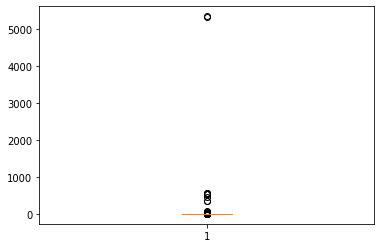

In [251]:
# #Plot boxplot to visualize Outliers
# %matplotlib inline  
plt.boxplot(data['passenger_count'])
plt.show()


data['passenger_count'].value_counts()

#From the test set and boxplot, it is implied that the range of passenger count is within 1-6
data = data.drop(data[data.loc[:,'passenger_count'] < 1].index)
data = data.drop(data[data.loc[:,'passenger_count'] > 6].index)

In [252]:
len(data)

12988

# Feature Extraction

In [253]:
!pip install haversine
from haversine import haversine

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [254]:
###Feature Extraction
#Feature Extraction from existing available variables
data['distance']=0

for i in range(0,len(data)):
    data['distance'].iloc[i]=haversine((data['pickup_latitude'].iloc[i],data['pickup_longitude'].iloc[i]),(data['dropoff_latitude'].iloc[i],data['dropoff_longitude'].iloc[i])) 
        
print("column inserted")
###Distance in KM

C:\Users\HP\AppData\Local\Temp\ipykernel_2516\884195347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance'].iloc[i]=haversine((data['pickup_latitude'].iloc[i],data['pickup_longitude'].iloc[i]),(data['dropoff_latitude'].iloc[i],data['dropoff_longitude'].iloc[i]))


column inserted


In [255]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,dayofweek,hour,minute,distance
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,8.339666,-73.981776,40.752936,-73.980939,40.753415,1.647213,2011.684016,6.215892,15.672621,3.011010,13.675239,29.744456,2.252841
std,3.453875,0.015966,0.021425,0.016459,0.022141,1.265408,1.860980,3.455540,8.689594,1.958596,6.347404,17.288223,1.488920
min,0.010000,-74.018108,40.686538,-74.019535,40.690125,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,-73.992761,40.738551,-73.991979,40.739038,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.165012
50%,7.700000,-73.982643,40.753553,-73.982044,40.754606,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,1.877787
75%,10.500000,-73.971351,40.766866,-73.970702,40.767401,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,2.978875
max,18.500000,-73.935007,40.815825,-73.933333,40.815357,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,10.631679


In [256]:
#distance can't be 0, so removing those datas
data = data[(data['pickup_latitude'] != data['dropoff_latitude']) & (data['pickup_longitude'] != data['dropoff_longitude'])]

In [257]:
len(data)

12874

In [258]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,dayofweek,hour,minute,distance
count,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000,12874.000000
mean,8.353517,-73.981790,40.752959,-73.980946,40.753442,1.648672,2011.685568,6.220755,15.671819,3.013904,13.679897,29.753379,2.272620
std,3.452793,0.015946,0.021415,0.016446,0.022136,1.266726,1.863041,3.456903,8.693171,1.958525,6.345621,17.291956,1.480471
min,0.010000,-74.018108,40.686538,-74.019535,40.690125,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000202
25%,5.700000,-73.992763,40.738553,-73.991973,40.739061,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,1.184311
50%,7.700000,-73.982641,40.753563,-73.982029,40.754633,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,1.893020
75%,10.500000,-73.971368,40.766879,-73.970764,40.767438,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,2.991846
max,18.500000,-73.935007,40.815825,-73.933333,40.815357,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,10.631679


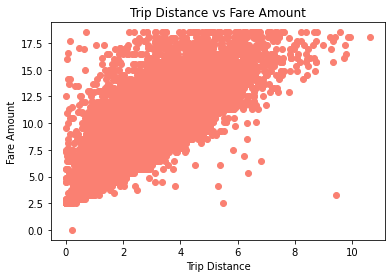

In [259]:
#Plot of Distance VS Fare
plt.scatter(x=data['distance'],y=data['fare_amount'], color = 'salmon')
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")
plt.show()

In [260]:
for i in float_variable:
    data[i] = data[i].astype('int64')

In [261]:
print(data.dtypes)
data['fare_amount'].describe()

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
date                          int64
dayofweek                     int64
hour                          int64
minute                        int64
distance                    float64
dtype: object


count    12874.000000
mean         8.353517
std          3.452793
min          0.010000
25%          5.700000
50%          7.700000
75%         10.500000
max         18.500000
Name: fare_amount, dtype: float64

In [262]:
data[data['pickup_longitude']<-90]
data[data['pickup_longitude']>90]
data[data['dropoff_longitude']<-90]
data[data['dropoff_longitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,dayofweek,hour,minute,distance


In [263]:
data[data['pickup_longitude']<-180]
data[data['pickup_longitude']>180]
data[data['dropoff_longitude']<-90]
data[data['dropoff_longitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,dayofweek,hour,minute,distance


In [264]:
print(data.shape)

(12874, 14)


In [265]:
data = data.drop(['pickup_datetime'],axis = 1)

In [266]:
data2 = data

In [267]:
trips_dayofweek = pd.DataFrame(data['dayofweek'].value_counts())
trips_dayofweek = trips_dayofweek.reset_index()
trips_dayofweek = trips_dayofweek.rename(columns = {'index':'pickup_day','dayofweek':'num_trips'})

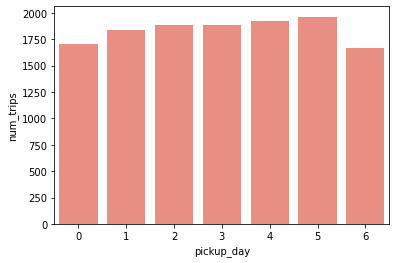

In [268]:
sns.barplot(x='pickup_day',y='num_trips',data=trips_dayofweek, color = 'salmon')
plt.show()

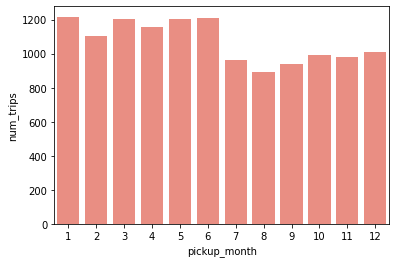

In [269]:
trips_month=pd.DataFrame(data['month'].value_counts())
trips_month=trips_month.reset_index()
trips_month=trips_month.rename(columns={'index':'pickup_month','month':'num_trips'})


sns.barplot(x='pickup_month',y='num_trips',data=trips_month,color = 'salmon')
plt.show()

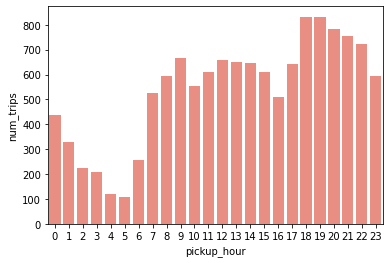

In [270]:
#pickup_hour
trips_hour=pd.DataFrame(data['hour'].value_counts())
trips_hour=trips_hour.reset_index()
trips_hour=trips_hour.rename(columns={'index':'pickup_hour','hour':'num_trips'})


sns.barplot(x='pickup_hour',y='num_trips',data=trips_hour, color = 'salmon')
plt.show()

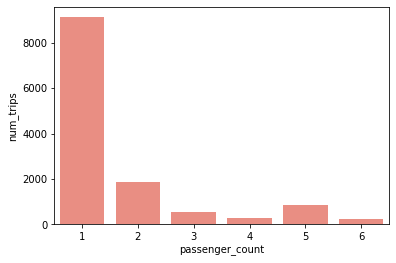

In [271]:
#passenger_count
pass_count=pd.DataFrame(data['passenger_count'].value_counts())
pass_count=pass_count.reset_index()
pass_count=pass_count.rename(columns={'index':'passenger_count','passenger_count':'num_trips'})


sns.barplot(x='passenger_count',y='num_trips',data=pass_count,color = 'salmon')
plt.show()

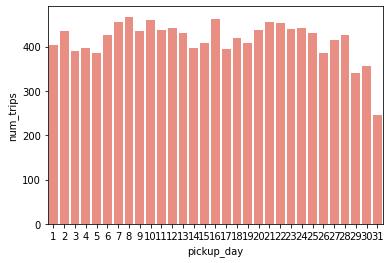

In [272]:
##pickup_day
trips_day=pd.DataFrame(data['date'].value_counts())
trips_day=trips_day.reset_index()
trips_day=trips_day.rename(columns={'index':'pickup_day','date':'num_trips'})


sns.barplot(x='pickup_day',y='num_trips',data=trips_day,color = 'salmon')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2516\2837068730.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


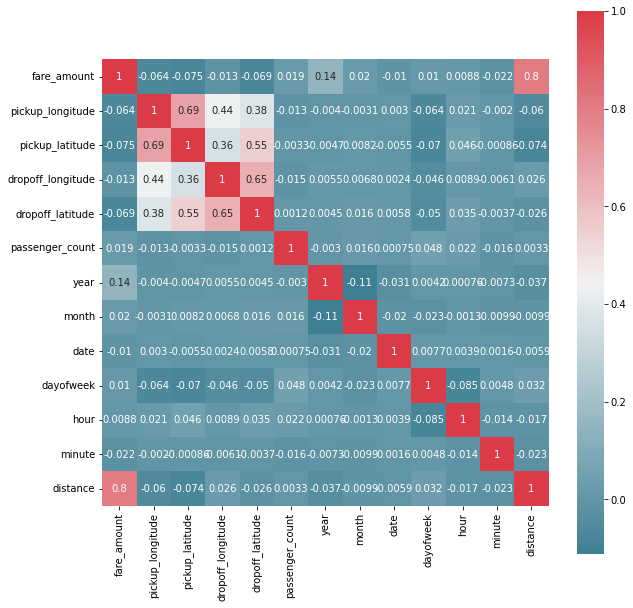

In [273]:
col_list=list(data.columns.values)
df_corr = data.loc[:,col_list]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

# Modelling

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
y = data['fare_amount']
X = data.drop(['fare_amount'],axis = 1)

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)

In [277]:
#Error Metrics
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
from sklearn.metrics import r2_score

# Model development

In [278]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
regressor =RandomForestRegressor(n_estimators=25, max_features=6, max_depth=25, min_samples_split=3,
                              min_samples_leaf=2, random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)


print("MAPE for Random Forest is ",MAPE(y_test, y_pred))
print("Accuracy for Random Forest  is ",100-MAPE(y_test, y_pred))
print("r2_score for Random Forest is ",r2_score(y_test, y_pred))

MAPE for Random Forest is  16.821926523783848
Accuracy for Random Forest  is  83.17807347621616
r2_score for Random Forest is  0.7114128936216437


In [279]:
feature_importance =pd.DataFrame(regressor.feature_importances_,X_train.columns)
feature_importance = feature_importance.reset_index()
feature_importance.columns = ['features','importances']
feature_importance = feature_importance.sort_values('importances',ascending = False)

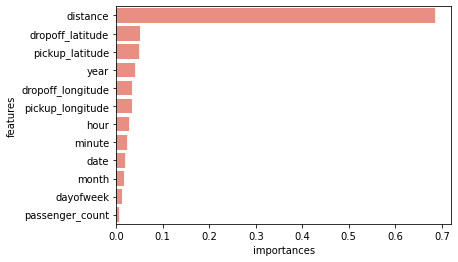

In [280]:
sns.barplot(x ='importances',y = 'features', data = feature_importance, color = 'salmon')
plt.show()

In [281]:
# stat model linear regression
train,test =train_test_split(data,test_size = 0.25)

# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Building Random forest model
Model_LR = LinearRegression().fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
predictions_LR = Model_LR.predict(test.iloc[:,1:])
mape = MAPE((test.iloc[:,0]),predictions_LR)
print('mape',mape)
print('accuracy',100-mape)
print('r2_score',r2_score(test.iloc[:,0],predictions_LR))

mape 18.531133085342745
accuracy 81.46886691465726
r2_score 0.6909724658713294


In [282]:
#sklearn Linear regression

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred=lm.predict(X_test)

print("MAPE",MAPE(y_test, y_pred))
print("Accuracy",100-MAPE(y_test, y_pred))
print("r2_score",r2_score(y_test, y_pred))

MAPE 18.457182825585715
Accuracy 81.54281717441428
r2_score 0.6659403445269338


In [283]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)
# predict
y_pred = regressor.predict(X_test) 
  
print("MAPE",MAPE(y_test, y_pred))
print("Accuracy",100-MAPE(y_test, y_pred))
print("r2_score",r2_score(y_test, y_pred))

MAPE 23.70315227319925
Accuracy 76.29684772680075
r2_score 0.4327982495243574


In [284]:
## KNearest Neighbors

train , test = train_test_split(data, test_size = 0.25)
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 35).fit(train.iloc[:,1:],train.iloc[:,0])
knn_predictions = knn_model.predict(test.iloc[:,1:])
mape = MAPE(test.iloc[:,0],knn_predictions)
print('mape',mape)
print('accuracy',100-mape)

mape 58.64270673063046
accuracy 41.35729326936954


In [285]:
#since sklearn linear regression has the highest accuracy, so freezing this model for our test data.

# Cleaning the test data for modelling

In [286]:
data_test = pd.read_csv('test_data.csv')

In [287]:
data_test.head(10)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


In [288]:
#type conversion
data_test['pickup_datetime'] = pd.to_datetime(data_test['pickup_datetime'],format = '%Y-%m-%d %H:%M:%S UTC',errors = 'coerce')

data_test['year'] = data_test['pickup_datetime'].dt.year
data_test['month'] = data_test['pickup_datetime'].dt.month
data_test['date'] = data_test['pickup_datetime'].dt.day
data_test['dayofweek'] = data_test['pickup_datetime'].dt.dayofweek
data_test['hour'] = data_test['pickup_datetime'].dt.hour
data_test['minute'] = data_test['pickup_datetime'].dt.minute

float_variable = ['passenger_count', 'year','month','date','dayofweek','hour','minute']
missing_val_test = pd.DataFrame(data_test.isnull().sum())

In [289]:
missing_val_test

,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
month,0
date,0
dayofweek,0


In [290]:
data_test= data_test.drop(['pickup_datetime'],axis =1)

In [291]:
data_test['distance']=0

for i in range(0,len(data_test)):
    data_test['distance'].iloc[i]=haversine((data_test['pickup_latitude'].iloc[i],data_test['pickup_longitude'].iloc[i]),(data_test['dropoff_latitude'].iloc[i],data_test['dropoff_longitude'].iloc[i])) 

C:\Users\HP\AppData\Local\Temp\ipykernel_2516\2508136145.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['distance'].iloc[i]=haversine((data_test['pickup_latitude'].iloc[i],data_test['pickup_longitude'].iloc[i]),(data_test['dropoff_latitude'].iloc[i],data_test['dropoff_longitude'].iloc[i]))


In [292]:
predicted_fare_amount = lm.predict(data_test)

In [293]:
data_test['predicted_fare_amount'] = predicted_fare_amount

In [294]:
data_test.to_csv('Cab_fare_PredictionPython.csv', index = False)